In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
data = pd.read_csv('train.csv')

In [9]:
del data['year_month']

In [10]:
data[:5]

,text,smishing
0,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


In [13]:
text = data['text']
smishing = data['smishing']

In [15]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

In [76]:
word_to_index = tokenizer.word_index

In [77]:
vocab_size = len(word_to_index)+1

In [23]:
n_of_train = int(295945 * 0.8)
n_of_test = int(295945 - n_of_train)
print(n_of_train)
print(n_of_test)

236756
59189


메일의 최대 길이 : 317
메일의 평균 길이 : 34.196966


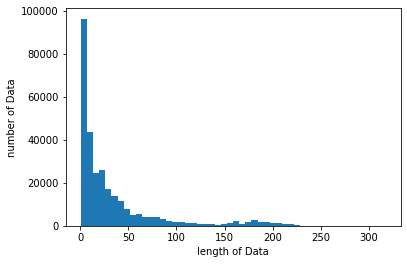

In [20]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [22]:
max_len = 400
data = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (295945, 400)


In [25]:
X_test = data[n_of_train:] 
y_test = np.array(smishing[n_of_train:]) 
X_train = data[:n_of_train]
y_train = np.array(smishing[:n_of_train]) 

In [26]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

In [27]:
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 189404 samples, validate on 47352 samples
Epoch 1/4
189404/189404 [==============================] - 454s 2ms/sample - loss: 0.0124 - acc: 0.9974 - val_loss: 0.0105 - val_acc: 0.9980
Epoch 2/4
189404/189404 [==============================] - 484s 3ms/sample - loss: 0.0024 - acc: 0.9995 - val_loss: 0.0120 - val_acc: 0.9973
Epoch 3/4
189404/189404 [==============================] - 474s 3ms/sample - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0213 - val_acc: 0.9970
Epoch 4/4
189404/189404 [==============================] - 466s 2ms/sample - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0140 - val_acc: 0.9978


In [28]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

59189/59189 [==============================] - 30s 506us/sample - loss: 0.0905 - acc: 0.9862

 테스트 정확도: 0.9862


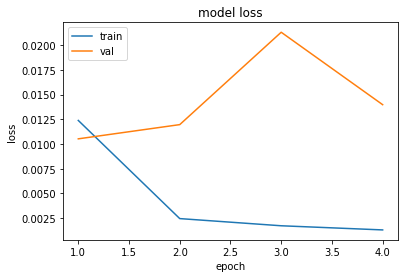

In [29]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [31]:
data2 = pd.read_csv('public_test.csv')

In [32]:
data2[:5]

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [39]:
del data2['year_month']

In [40]:
data2[:5]

,text
0,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [49]:
text2 = data2['text']
len(text2)

1626

In [58]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text2)
sequences = tokenizer.texts_to_sequences(text2)


In [46]:
word_to_index = tokenizer.word_index

In [59]:
vocab_size = len(word_to_index)+1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 19319


메일의 최대 길이 : 278
메일의 평균 길이 : 62.847478


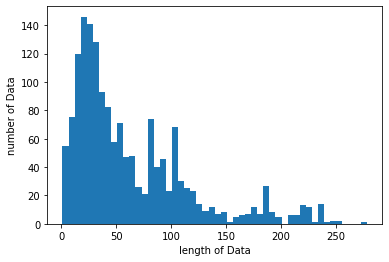

In [60]:
X_data = sequences
print('메일의 최대 길이 : %d' % max(len(l) for l in X_data))
print('메일의 평균 길이 : %f' % (sum(map(len, X_data))/len(X_data)))
plt.hist([len(s) for s in X_data], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [66]:
max_len = 500
data2 = pad_sequences(X_data, maxlen=max_len)
print("data shape: ", data.shape)

data shape:  (1626, 500)


In [68]:
test = data2[:] 

array([[    0,     0,     0, ...,   414,    27,  5452],
       [    0,     0,     0, ...,   939,    52,    27],
       [    0,     0,     0, ...,  4164,   561,  4165],
       ...,
       [    0,     0,     0, ...,   286,   161, 19303],
       [    0,     0,     0, ...,    20,     1,     1],
       [    0,     0,     0, ...,    20,     1,     1]])

In [78]:
pred=model.predict_classes(data2, verbose=0)

In [72]:
df = pd.DataFrame(pred)
df.to_csv('file.csv')

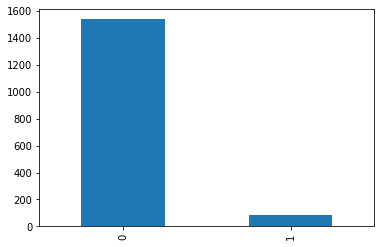

In [75]:
result =  pd.read_csv('file.csv')
result['0'].value_counts().plot(kind='bar')